<a href="https://colab.research.google.com/github/idelvalle/03MAIR-Algoritmos-de-optimizacion/blob/master/SEMINARIO/Seminario_Ignacio_del_Valle_Torres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  Ignacio del Valle Torres <br>
Url: https://github.com/idelvalle/03MAIR-Algoritmos-de-optimizacion/tree/master/SEMINARIO<br>

Problema:

1. **Elección de grupos de población homogéneos**

Descripción del problema: 

* Una productora ganadera nos encarga la tarea de seleccionar grupos de terneros para aplicar 3 tratamientos diferentes.

* Para cada uno de los tratamientos debemos seleccionar 3 grupos de terneros que sean lo mas homogéneos posible en peso para que en los resultados del tratamiento influya lo menos posible el peso del animal.

* Disponemos de una población de N animales entre machos y hembras.

* Hemos podido averiguar que el peso medio del ternero es 37kg con una desviación estándar de 2.1.

Se solicita diseñar un algoritmo para conseguir una agrupación que cumpla de la mejor manera posible las especificaciones de la productora.

(*) La respuesta es obligatoria





                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




**Respuesta**:<br>

El cálculo del número total de soluciones lo realizo de la siguiente manera: si tenemos en total N terneros y que remos realizar tres tratamientos con tres grupos en cada uno tendremos un total de 9 grupos totales posibles a ordenar.

El **número de soluciones totales sin restricciones** sería el número de variaciones sin repetición, V (cada ternero solo puede ir a un grupo) de N elementos en 9 grupos. Es decir: las ordenaciones sin repetición de los N elementos del conjunto tomadas de n en n (en este caso n es igual a 9)

V N,9 = N(N-1)(N-2)....(N-9+1) =  N(N-1)(N-2)(N-3)(N-4)(N-5)(N-6)(N-7)(N-8)

Con respecto a las **restricciones**, considero que según el enunciado del problema la única variable a tener en cuenta en la resolución  ha de ser el peso del animal (ha de influir lo menos posible en los resultados de cada uno de los tratamientos)

De esta forma, como en la población N hay una mezcla de machos y hembras, sería la restricción principal a tener en cuenta para calcular el número de soluciones. Por ello considero que una solución sería dividir el conjunto inicial N en machos y hembras, teniendo de esta manera dos espacios de datos sobre los que habría que calcular el número de soluciones de la misma manera que anteriormente:

* Si el número de machos (m) es igual a N menos el número de hembras (h):

V m,9 = m(m-1)(m-2)....(m-9+1) =  m(m-1)(m-2)(m-3)(m-4)(m-5)(m-6)(m-7)(m-8) Sería el número de soluciones para el grupo de machos

* Si el número de hembras (h) es igual a N menos el número de machos (m):

V h,9 = h(h-1)(h-2)....(h-9+1) =  h(h-1)(h-2)(h-3)(h-4)(h-5)(h-6)(h-7)(h-8) Sería el número de soluciones para el grupo de hembras




Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta:

Para modelar el problema tengo que tener en cuenta las siguientes variables:

* El peso del grupo de terneros machos (M) y del grupo de terneros hembras (H)

* El número de tratamientos: van a ser tres tratamientos: A, B y C. Los guardo en un diccionario para facilitar acceso a claves y valores.

* El número de grupos dentro de cada tratamiento: 0, 1 y 2

Dichas variables se pueden modelar de la siguiente manera (uso un ejemplo de tres machos y tres hembras para simplificar)

In [6]:
MACHOS=[29.9, 31.2, 31.6]

HEMBRAS=[26.8, 32.4, 31.4]

TRATAMIENTO = {"A":0,"B":1,"C":2}

GRUPO = [0,1,2]

print(MACHOS)
print(HEMBRAS)
print(TRATAMIENTO)
print(GRUPO)
 
  

[29.9, 31.2, 31.6]
[26.8, 32.4, 31.4]
{'A': 0, 'B': 1, 'C': 2}
[0, 1, 2]


Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta:<br>

De acuerdo al enunciado del problema "debemos seleccionar 3 grupos de terneros que sean lo mas homogéneos posible en peso para que en los resultados del tratamiento influya lo menos posible el peso del animal". Lo que entiendo es que los tratamientos son independientes entre sí: no hay que tener en cuenta la distancia entre cada uno de los tratamientos.

Por tanto, para cada tratamiento hay que conseguir 3 grupos que sean lo más homogéneos posible entre sí en función del peso.

Aunque considero inicialmente que los tratamientos son independientes entre sí, la manera más óptima que he encontrado para resolver el problema es la siguiente: 

* Asignar para cada uno de los dos datasets (MACHOS o HEMBRAS) la pertenencia a un TRATAMIENTO de la siguiente manera: de la lista con pesos para todos los machos, asignar al grupo A al ternero con peso más cercano a la media, asignar al B el siguiente punto más cercano a la media y luego con el C. Repetir mismo proceso para el resto de puntos. 

* Una vez tenga asignados todos los machos a cada uno de los tres TRATAMIENTOs repetir el proceso para dividir cada TRATAMIENTO en tres grupos. Repetir misma metodología para el dataset de HEMBRAS.

Adjunto gráfico en una celda posterior para aclarar el proceso que he pensado para asignación de grupos.

De esta manera, la **función objetivo** consistiría en minimizar las distancias en peso para cada uno de los GRUPOS.

Al ser un problema de agrupamiento en base a reducción de una variable se trata de un problema de  **minimización** .

In [0]:
# La función a minimizar sería la distancia de cada uno de los puntos a la media. Habría que repetir el mismo cállculo para el set de datos de las HEMBRAS
def distancia(MACHOS, MEDIA):
  MEDIA = 37
  MACHOS = [pesos machos]
  for i in range(len(MACHOS)):
    return abs(MEDIA-MACHOS[i])

In [0]:
from google.colab import files
from IPython.display import Image

In [12]:
uploaded = files.upload()

Saving Seminario.png to Seminario.png


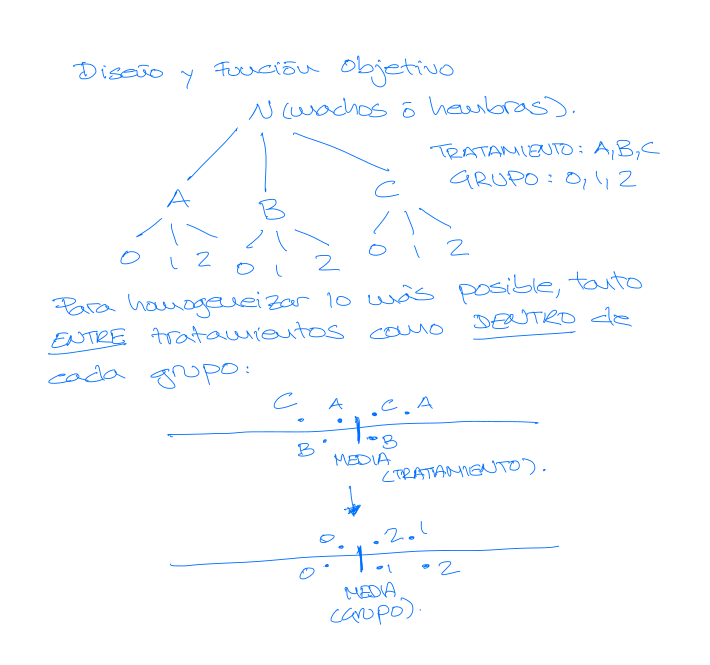

In [13]:
Image("Seminario.png")

Diseña un algoritmo para resolver el problema por fuerza bruta

El algoritmo por fuerza bruta que se ocurre implementar para este problema consiste básicamente en lo que he tratado de explicar en el punto anterior:
  
1- Asignar primero cada uno de los terneros a cada uno de los tres tratamientos en base a distancia a la media.

2- Si queremos además que el tamano de cada uno de los tres tratamientos sea lo mas homogéneo posible, vamos asignando MACHOS o HEMBRAS a cada uno de los tres TRATAMIENTOs hasta que el número total sea sea divisible entre 3 (por ejemplo, si hay 28 machos en total, tendríamos 3 TRATAMIENTOs (cada uno compuesto por 9 terneros) con 3 GRUPOs cada uno de tres terneros, quedando un ternero fuera del análisis). Al no decir nada el enunciado con respecto a tener que usar TODOS los animales, considero que esta sería una buena aproximación para tener grupos balanceados. 

3- Una vez formados los tres TRATAMIENTOs, repetir el proceso de asignación del apartado anterior en base a distancia a la media dentro de cada GRUPO para ir asignando terneros a cada uno de los tres grupos.

4- Cada uno de los grupos no debería estar separado de otro por una distancia superior a la desviación estándar dada por el problema (2 en este caso)

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

Mediante la fuerza bruta estamos examinando todas las posibles soluciones (distancias en media entre los terneros) y nos quedamos en cada caso con la mejor solución.

En este caso es un procedimiento muy costoso (especialmente si el número de terneros es muy elevado). Al estar calculando la distancia entre cada uno de los terneros, la complejidad va a ser similar al problema ya resuelto en la asignatura de la distancia entre dos puntos (teniendo que repetirlo 2 veces, para la asignación de TRATAMIENTOs y de GRUPOs). Y además hacer lo mismo en función del sexo.

La complejidad va a ser exponencial, de al menos O(n^2), probablemente incluso factorial.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

Al tener que realizar una búsqueda tan exhaustiva por fuerza bruta, creo que las dos siguientes aproximaciones podrían ser a priori buenas para resolver este poblema:

1 - **Algoritmo Voraz**: Si tenemos un grupo de N terneros con una media y desviación estándar {M, SD} y lo queremos dividir en 9 GRUPOs, podemos elegir el subset N/9 con una media y desviación estándar {m,sd} más cercana a la de la población N y asignar este subset al grupo A. Repetir procedimiento y asignar al grupo B y así sucesivamente hasta terminar con la lista de terneros a asignar. 

2-  **Algoritmos de Búsqueda**: Se trata de un problema que se puede modelar con una estructura de datos tipo árbol, con lo que puedo utilizar la técnica de ramificación y poda.
Podemos ir podando en función de las cotas inferiores y superiores en cada nodo. 

Como no hay que explorar todas las soluciones, va a resultar más eficiente que fuerza bruta (y más que el resto de algoritmos de búsqueda en árboles)

(*)Calcula la complejidad del algoritmo 

Respuesta

Al resolver el problema mediante el árbol binario de búsqueda podemos mejorar la complejidad hasta O(nlogn) o cuasi-lineal

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Si queremos un set de datos con exactamente media de 37 y desviación estándar 2.1 lo podemos conseguir mediante el uso del código mostrado en la siguiente celda (código adaptado de la web, link en referencias). Habría que aplicarlo dos veces, una para terneros MACHOS y otra vez para terneros HEMBRAS.

In [9]:
import numpy as np

num_samples = 300
desired_mean = 37.0
desired_std_dev = 2.1

samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

actual_mean = np.mean(samples)
actual_std = np.std(samples)
print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".format(actual_mean, actual_std))

zero_mean_samples = samples - (actual_mean)

zero_mean_mean = np.mean(zero_mean_samples)
zero_mean_std = np.std(zero_mean_samples)
print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".format(zero_mean_mean, zero_mean_std))

scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
scaled_mean = np.mean(scaled_samples)
scaled_std = np.std(scaled_samples)
print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".format(scaled_mean, scaled_std))

final_samples = scaled_samples + desired_mean
final_mean = np.mean(final_samples)
final_std = np.std(final_samples)
print("Final samples stats     : mean = {:.4f} stdv = {:.4f}".format(final_mean, final_std))

Initial samples stats   : mean = 0.0527 stdv = 2.0311
True zero samples stats : mean = -0.0000 stdv = 2.0311
Scaled samples stats    : mean = -0.0000 stdv = 2.1000
Final samples stats     : mean = 37.0000 stdv = 2.1000


Aplica el algoritmo al juego de datos generado

Respuesta

La verdad es que estoy aprendiendo programación con python en este Máster, así que a lo que llego es a buscar código y tratar de entenderlo. El siguiente código obtenido de Internet (ver referencia en referencias) trata de agrupar valores en base a distancia entre GRUPOs. Habría que agrupar posteriormente los grupos obtenidos para generar los TRATAMIENTOs (mediante el uso de `.append()`)

Otra posibilidad que he encontrado para resolver el problema de particiones podría ser la optimización de Jenks de particiones (ver referencia más adelante)

In [0]:
from math import sqrt

def stat(lst):
    """Calculate mean and std deviation from the input list."""
    n = float(len(lst))
    mean = sum(lst) / n
    stdev = sqrt((sum(x*x for x in lst) / n) - (mean * mean)) 
    return mean, stdev

def parse(lst, n):
    cluster = []
    for i in lst:
        if len(cluster) <= 1:    # the first two values are going directly in
            cluster.append(i)
            continue

        mean,stdev = stat(cluster)
        if abs(mean - i) > n * stdev:    # check the "distance"
            yield cluster
            cluster[:] = []    # reset cluster to the empty list

        cluster.append(i)
    yield cluster           # yield the last cluster

In [6]:
for cluster in parse(final_samples, 2):
  print(cluster)

[31.07170716162526, 31.287674782770175]
[25.83391531733702, 30.469326396340644, 24.747617369963145, 28.292777482493356, 28.52913492413346, 27.343878375659916, 29.84112802806389, 30.527464678831297, 28.30755825581927, 28.005989896225852, 29.2824060763376, 30.16308331042458]
[32.92506456305793, 30.475771996742772, 30.842039345402064, 32.67293252464282]
[28.738649513371012, 28.19861309486684]
[25.356536236079837, 28.435542794365606, 26.940777015031344, 29.416191693112694, 28.743858564644132, 30.185598848110583, 30.06854483197117]
[34.15222031306979, 27.70691620217082, 30.246764939457695, 31.274352793939602]
[24.958914495717686, 32.34151875976642, 29.491222595448967, 31.253263299314433, 30.865821836601626, 31.849841760357535, 31.79996398981821, 29.3135526946423, 31.65594524479318, 27.542164174229182, 31.5841390467559, 26.425172999473087, 29.95048827150749, 28.604580926294112, 27.395721791218826, 30.50494700389875, 26.429502917398125]
[33.98786230197439, 32.41648374978864, 32.51517175212745

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo



Respuesta

* Repaso de técnicas de sampleo: https://towardsdatascience.com/sampling-techniques-a4e34111d808

* Para la generación del set de datos: https://stackoverflow.com/questions/51515423/generate-sample-data-with-an-exact-mean-and-standard-deviation

* Una posible solución de partición en 1D (Jenks natural breaks optimization): https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization

* Código usado para agrupación de valores: https://stackoverflow.com/questions/8940049/how-would-you-group-cluster-these-three-areas-in-arrays-in-python/8941175#8941175

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

Con el objetivo de mejorar o realizar aproximaciones distintas al problema se me ocurren los siguientes puntos:

1- Tener en cuenta además del peso del ternero, el sexo. Considero que el sexo del animal va a ser un factor determinante en cualquier tipo de tratamiento. Por ello, podemos realizar un análisis multivariable (en función del peso y el sexo).

Al tener en cuenta los dos factores podríamos utilizar técnicas de **clustering** (como un análisis de componentes principales) que nos permitieran la clasificación de distintos grupos visualmente de manera sencilla.

2- Si el número de terneros es muy elevado podemos utilizar técnicas **metaheurísticas** de búsqueda local, generando de esta manera soluciones en función de vecindad entre terneros basadas en trayectorias. Otra posibilidad sería el uso de la técnica de colonias de hormigas, usando aprendizaje reforzado para encontrar la mejor solución al problema (construcción de los grupos mas homogéneos)